## An introductory demonstration of PyFVTool

The general form of the partial differential equations solved in PyFVTool is 
    $$ \alpha \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) + \beta \varphi = \gamma $$

with general boundary conditions
    $$ a\nabla\varphi\cdot \vec{e} + b\varphi = c $$.


PyFVTool works in a standard scientific Python environment, so make NumPy and Matplotlib available. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import the error function from scipy
from scipy.special import erf

The recommended way of importing PyFVTool is to use `pf` as the shortcut.

In [3]:
import pyfvtool as pf

### Create a 1D mesh and visualize it

The simplest mesh is the Cartesian 1D grid, an example of which will be created here.

The mesh-structure object is created via the `Grid1D` class.

In [4]:
L = 1.0  # length of the domain
Nx = 10  # number of cells in the domain

In [5]:
m = pf.Grid1D(Nx, L) # mesh-structure

We can have a look at the structure of the mesh that was created.

The `_x`, `_y`, `_z` are the coordinate labels used internally by PyFVTool. These are not intended to be used directly by the user.

The coordinate labels for the user are given in the `coordlabels` dictionary. In this particular `Grid1D` case, the user `x` label maps to the internal `_x` label. The other coordinates are not used, as the mesh is one-dimensional.

In [6]:
print(m)

dims: [10]
cellsize: _x: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

cellcenters: _x: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

facecenters: _x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

corners: [1]
edges: [1]



1D meshes can be created in two ways because the function is overloaded, as shown in the help docstring.

In [7]:
help(pf.Grid1D)

Help on class Grid1D in module pyfvtool.mesh:

class Grid1D(MeshStructure)
 |  Grid1D(*args)
 |
 |  Mesh based on a 1D Cartesian grid (x)
 |  =====================================
 |
 |  This class can be instantiated in different ways: from a list of cell face
 |  locations or from the number of cells and domain length.
 |
 |  Instantiation Options:
 |  ----------------------
 |  - Grid1D(Nx, Lx)
 |  - Grid1D(face_locationsX)
 |
 |
 |  Parameters
 |  ----------
 |  Grid1D(Nx, Lx)
 |      Nx : int
 |          Number of cells in the x direction.
 |      Lx : float
 |          Length of the domain in the x direction.
 |
 |  Grid1D(face_locationsX)
 |      face_locationsX : ndarray
 |          Locations of the cell faces in the x direction.
 |
 |  Examples
 |  --------
 |  >>> import numpy as np
 |  >>> from pyfvtool import Grid1D
 |  >>> mesh = Grid1D(10, 10.0)
 |  >>> print(mesh)
 |
 |  Method resolution order:
 |      Grid1D
 |      MeshStructure
 |      builtins.object
 |
 |  Methods 

In [8]:
# 1D, 2D, 3D, 1D radial (axial symmetry), and 2D cylindrical grids can be constructed: 
# help(pf.Grid1D)
# help(pf.Grid2D)
# help(pf.Grid3D)
# help(pf.CylindricalGrid1D)
# help(pf.CylindricalGrid2D)

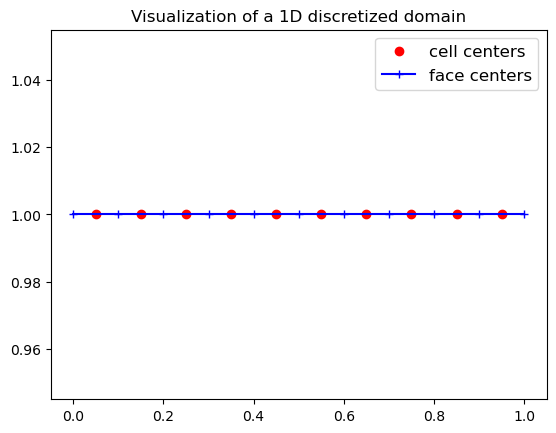

In [9]:
# Visualize the 1D discretization that we created above
hfig, ax = plt.subplots(1,1, num='Grid discretization')
ax.plot(m.cellcenters.x, np.ones(np.shape(m.cellcenters.x), dtype=float), 'or', label='cell centers')
ax.plot(m.facecenters.x, np.ones(np.shape(m.facecenters.x), dtype=float), '-+b', label='face centers')
plt.legend(fontsize=12, loc='best')
ax.set_title('Visualization of a 1D discretized domain');

### Create a 2D grid and visualize it

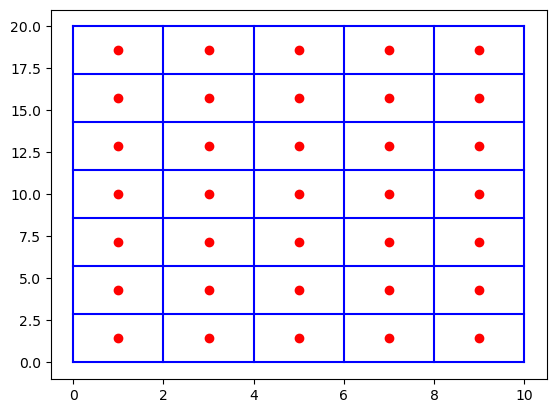

In [10]:
Nx, Ny = 5, 7
Lx, Ly = 10.0, 20.0
m = pf.Grid2D(Nx, Ny, Lx, Ly)

X, Y = np.meshgrid(m.cellcenters.x, m.cellcenters.y, indexing='ij')
Xf, Yf = np.meshgrid(m.facecenters.x, m.facecenters.y, indexing='ij')

plt.figure()
plt.plot(X, Y, 'or', label='nodes')
plt.plot(Xf, Yf, 'b-', label='faces (west/east)')
plt.plot(Xf.T, Yf.T, 'b-', label='faces (north/south)');

### Create a 3D grid and visualize it

In [11]:
Nx, Ny, Nz = 2, 3, 4
Lx, Ly, Lz = 1.0, 2.0, 3.0

m = pf.Grid3D(Nx, Ny, Nz, Lx, Ly, Lz)

We can obtain information of the positions of the cell centers.

As can be seen, the user coordinate labels `x`, `y` and `z` map internally to `_x`, `_y`, `_z`. The correspondence is trivial in this case, but this is not so in the case of cylindrical or spherical coordinates.

In [12]:
m.cellcenters

_x: [0.25 0.75]
_y: [0.33333333 1.         1.66666667]
_z: [0.375 1.125 1.875 2.625]
coordlabels: {'x': '_x', 'y': '_y', 'z': '_z'}

The (compact) information on the cell centers can be converted into a full grid in the following way.

In [13]:
X, Y, Z = np.meshgrid(m.cellcenters.x,
                      m.cellcenters.y,
                      m.cellcenters.z,
                      indexing='ij')
Xf, Yf, Zf = np.meshgrid(m.facecenters.x,
                         m.facecenters.y,
                         m.facecenters.z,  
                         indexing='ij')

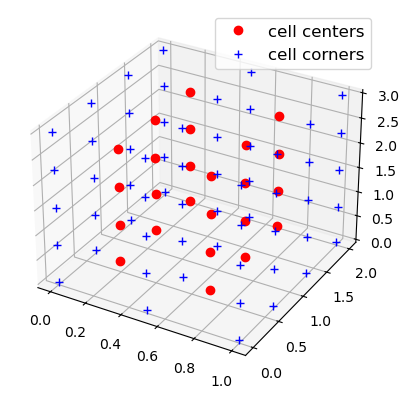

In [14]:
# Plot the 3D grid

# TO DO: make this interactive! this will require ipywidgets
# This can probably only be done once these Notebooks are not used as pytest tests anymore.
# The Notebooks used for tests should be converted to simple test scripts, and the Notebooks
# can then simply be used as examples.

hfig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(X.flatten(), Y.flatten(), Z.flatten(), 'ro', label='cell centers')
ax.plot3D(Xf.flatten(), Yf.flatten(), Zf.flatten(), 'b+', label='cell corners')
ax.legend(fontsize=12, loc='best');

### Boundary conditions

One of the most important features of PyFVTool is the ability to implement different boundary conditions (BCs) for variables in the most convenient way. 

The implementation of BCs in PyFVTool enables the user to define either a periodic boundary condition or a general boundary condition of the following form:

$$a (\nabla \phi .\mathbf{n}) + b \phi = c $$

In the above equation, $\phi$ is the unknown, and $a$, $b$, and $c$ are constants. In practice, this boundary condition equation will be discretized to the following system of algebraic equations:

$$M_{bc} \phi = {RHS}_{bc}$$

By adjusting the values of $a$, $b$ and $c$, one of the following well-known types of boundary conditions can easily be defined:

 - Neumann ($a$ is nonzero; $b$ is 0)
 - Dirichlet ($a$ is zero; $b$ is nonzero)
 - Robin ($a$ and $b$ are both nonzero)

First, let's create a simple mesh again.

In [15]:
Nx = 10  # number of cells in the domain
Lx = 1.0  # length of the domain
m = pf.Grid1D(Nx, Lx)  # createMesh and createMesh are identical

Then, on this mesh, we will define a solution variable, via the `CellVariable` class. We will initialize its value to be 0.0 everywhere.

In [16]:
phi = pf.CellVariable(m, 0.0)

The `CellVariable` object carries with it boundary conditions, that have been created by default. These boundary conditions will be applied by PyFVTool where required.

Let's have a look at the BC structure.

This also prints info on the mesh, which may be a bit confusing.

In [17]:
print(phi.BCs) # display the BC structure

domain : dims: [10]
cellsize: _x: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

cellcenters: _x: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

facecenters: _x: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
_y: [0.]
_z: [0.]
coordlabels: {'x': '_x'}

corners: [1]
edges: [1]

left : a : [1.]
b : [0.]
c : [0.]
periodic : False

right : a : [1.]
b : [0.]
c : [0.]
periodic : False

bottom : a : []
b : []
c : []
periodic : False

top : a : []
b : []
c : []
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False




For simplicity, display only information for the left boundary, and then only information for the right boundary.

In [18]:
print("Left BC")
print(phi.BCs.left)   # a non-zero, b and c == 0, --> homogeneous Neumann BC at left boundary
print()
print("Right BC")
print(phi.BCs.right)  # same as left boundary --> homogeneous Neumann BC at right-boundary

Left BC
a : [1.]
b : [0.]
c : [0.]
periodic : False


Right BC
a : [1.]
b : [0.]
c : [0.]
periodic : False



Both the left and right BCs have the same values for $a$, $b$ and $c$. These are the default BCs that are created: Neumann-style BCs with a zero value of the derivative at the boundary. Such BCs are also called "zero flux boundary conditions".

Boundary conditions can be adapted "on the fly", but once the values have been changed, be sure to call the `apply_BCs()` method, such that all internal information in the `CellVariable` is updated to reflect the new BCs. 

**Important note:** For properly setting the BCs, even in this 1D Cartesian case, be sure to assign values to the individual array elements using `[:]`. Forgetting the `[:]` here may lead to errors.

In [19]:
phi.BCs.left.a[:] = 0.0
phi.BCs.left.b[:] = 1.0  # homogeneous Dirichlet boundary condition
phi.BCs.left.c[:] = 0.0  

# Periodic boundary conditions override the other settings (take precedence)
phi.BCs.left.periodic = True

phi.apply_BCs()

print(phi.BCs.left)

a : [0.]
b : [1.]
c : [0.]
periodic : True



For boundary condition structures created for 2D and 3D grids, we will have left, right, bottom, top, back, and front boundaries and thus substructures. Let me show them to you in action:

In [20]:
m = pf.Grid2D(3, 4, 1.0, 2.0)  # Nx, Ny, Lx, Ly

phi = pf.CellVariable(m, 0.0)

print(phi.BCs)

domain : dims: [3 4]
cellsize: _x: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
_y: [0.5 0.5 0.5 0.5 0.5 0.5]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

cellcenters: _x: [0.16666667 0.5        0.83333333]
_y: [0.25 0.75 1.25 1.75]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

facecenters: _x: [0.         0.33333333 0.66666667 1.        ]
_y: [0.  0.5 1.  1.5 2. ]
_z: [0.]
coordlabels: {'x': '_x', 'y': '_y'}

corners: [ 0 24  5 29]
edges: [1]

left : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [[0. 0. 0. 0.]]
periodic : False

right : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [0. 0. 0. 0.]
periodic : False

bottom : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

top : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False




In [21]:
print(phi.BCs.top)

a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False



Yes, that's right. a, b, and c are vectors. It means that you can have different boundary conditions for different cell faces at each boundary. For instance, I can have a Neumann boundary condition for the first cell and a Dirichlet boundary condition for the last cell at the top boundary:


In [22]:
# homogeneous Neumann
phi.BCs.top.a[0] = 1.0
phi.BCs.top.b[0] = 0.0
phi.BCs.top.c[0] = 0.0

# homogeneous Dirichlet
phi.BCs.top.a[-1] = 0.0
phi.BCs.top.b[-1] = 1.0
phi.BCs.top.c[-1] = 0.0

phi.apply_BCs()

In [23]:
# Some fancy display!
print('  a  b  c (top)')
print('---------------')
print(np.hstack((np.atleast_2d(phi.BCs.top.a).T, 
                 np.atleast_2d(phi.BCs.top.b).T,
                 np.atleast_2d(phi.BCs.top.c).T)))

# top.  a     b     c
#    ---------------
#      1     0     0
#      1     0     0
#      0     1     0

  a  b  c (top)
---------------
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


The same procedure can be followed for a 3D grid. However, $a$, $b$, and $c$ values are 2D matrices for a 3D grid. This will be discussed in more details when we reach the practical examples. 

**Important note:** As already mentioned, if you need to assign a boundary condition to the entire boundary, use `[:]` in your assignment. For instance, to define a Dirichlet boundary for the right boundary, you may write the following.

In [24]:
phi.BCs.right.a[:] = 0
phi.BCs.right.b[:] = 1
phi.BCs.right.c[:] = 0

phi.apply_BCs()

print('  a  b  c (right)')
print('---------------')
print(np.hstack((np.atleast_2d(phi.BCs.right.a).T,
                 np.atleast_2d(phi.BCs.right.b).T,
                 np.atleast_2d(phi.BCs.right.c).T)))

  a  b  c (right)
---------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Solve a diffusion equation

As the first example, we solve a steady-state diffusion equation of the following form

$$\nabla\cdot\left(-D\nabla c\right)=0$$

where $D$ is the diffusivity and $c$ is the concentration. Let me assume that we have a 1D domain, with Dirichlet boundary conditions at both boundaries, i.e., at $x$=0, $c$=1; and at $x$=$L$, $c$=0. First of all, we need to define our domain, discretize it, and define the boundaries at the borders.

*Note:*  This is a boundary value problem and we will be solving for the steady-state solution, without any transient term.

First create a 1D Cartesian grid and a solution variable called `c`.

In [25]:
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid1D(Nx, L) 

c = pf.CellVariable(m, 0.0)

Now switch from the default 'no flux' boundary conditions to Dirichlet conditions, on both sides of the domain.

**IMPORTANT** Do not forget to call `apply_BCs()`!!

In [26]:
# left boundary 
c.BCs.left.a[:] = 0.0
c.BCs.left.b[:] = 1.0
c.BCs.left.c[:] = 0.0

# right boundary
c.BCs.right.a[:] = 0.0
c.BCs.right.b[:] = 1.0
c.BCs.right.c[:] = 1.0   

c.apply_BCs()

print(c.BCs.left)
print(c.BCs.right)

a : [0.]
b : [1.]
c : [0.]
periodic : False

a : [0.]
b : [1.]
c : [1.]
periodic : False



The next step is to define the diffusion coefficient. In this FVTool, the physical properties of the domain are defined for each cell, again as a `CellVariable` object.

*Remark.* This variable is not a solution variable, and even though the `CellVariable` will internally contain a default `BCs` structure, these 'dummy' boundary conditions will of course not be used, are of no consequence and can be forgotten.

In [27]:
D = pf.CellVariable(m, 1e-5)  # assign a constant value of 1e-5 to diffusivity value on each cell

However, the diffusion coefficients must be known on the *face* of each cell. 

To obtain the values at the faces from the values at the centers, we have a few typical FVM averaging schemes at our disposal. For a 1D domain, we can use a harmonic mean scheme.

Notes:
 - this "averaging" is actually an interpolation. It takes the nearest neighbor harmonic mean
 - the harmonic mean skews towards outliers with small values

In [28]:
D_face = pf.harmonicMean(D)  # average diffusivity value on the cell faces.

Now, we can convert the PDE to a, algebraic system of linear equations, i.e. a matrix equation to be solved.

$$\nabla\cdot\left(-D\nabla c\right) \rightarrow \mathbf{M}\mathbf{c} = \textrm{rhs}$$

$\mathbf{M}$ is the matrix of coefficients that is going to be constructed by PyFVTool, on basis of the finite-volume formulation. In this manner, PyFVTool will also construct the vector $\textrm{rhs}$ which is commonly called the right-hand side.

$\mathbf{M}$ and  $\textrm{rhs}$ will be constructed from the definition of the solution variable, in particular its boundary conditions, and (in this case) from the diffusion term. The latter will be placed in a list of equation terms that will be supplied to the solver function `solvePDE()`. If you look at it in detail, `pf.diffusionTerm()` creates a matrix that will be added to the overall matrix $\mathbf{M}$ for the matrix equation. This provides a mechanism for adding several different terms (diffusion, advection/convection, source/reaction) to the equation.

`solvePDE()` will take care of constructing the matrix equation, and then calling the numerical (sparse matrix) solver.

The vector $\mathbf{c}$ will contain the finite-volume cell values of the concentration as the numerical solution of the matrix equation.

In [29]:
eqnterms = [-pf.diffusionTerm(D_face)]

In [30]:
pf.solvePDE(c, eqnterms);

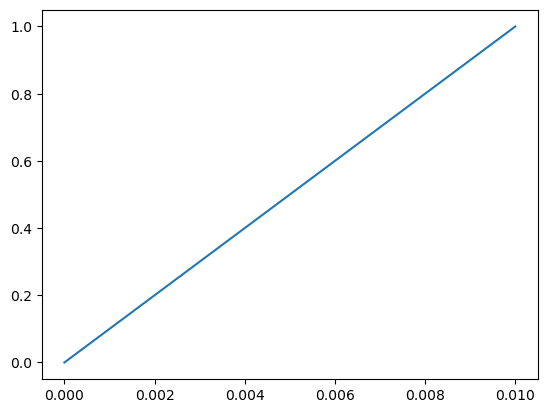

In [31]:
# visualize the solution
plt.figure()
pf.visualizeCells(c)

Just to get excited a little bit, only change the mesh definition command from `Grid1D(Nx,L)` to `Grid2D(Nx,Nx,L,L)`, run the code and see what happens.

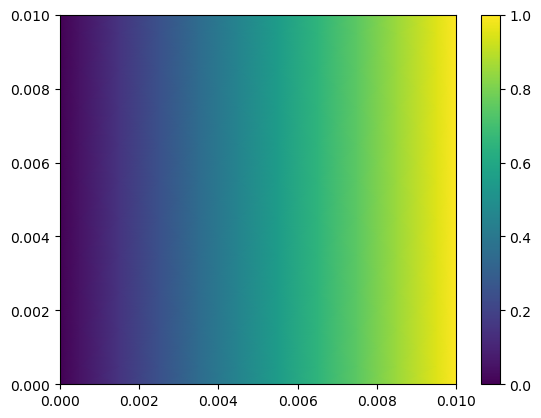

In [32]:
# 2D
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid2D(Nx, Nx, L, L)
c = pf.CellVariable(m, 0.0)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
# left boundary: homogeneous Dirichlet left-side 
c.BCs.left.a[:], c.BCs.left.b[:], c.BCs.left.c[:] = 0.0, 1.0, 0.0
# right boundary: inhomogeneous Dirchlet right-side
c.BCs.right.a[:], c.BCs.right.b[:], c.BCs.right.c[:] = 0.0, 1.0, 1.0

c.apply_BCs() # DO NOT FORGET THIS!!

# Create a face-variable for the diffusion coefficient
D = pf.CellVariable(m, 1e-5)  # define the diffusivity
D_face = pf.harmonicMean(D)  # interpolate to face positions

# Solve the problem in 2D
eqnterms = [-pf.diffusionTerm(D_face)]
pf.solvePDE(c, eqnterms)

# Visualize the solution
plt.figure()
pf.visualizeCells(c)
plt.colorbar();

For even more excitement, change  to `Grid3D(Nx,Nx,Nx,L,L,L)`!

<Figure size 640x480 with 0 Axes>

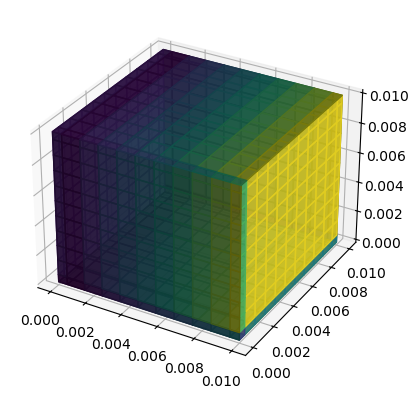

In [33]:
# 3D
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = pf.Grid3D(Nx, Nx, Nx, L, L, L)  
c = pf.CellVariable(m, 0.0)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
# left boundary: homogeneous Dirichlet left-side 
c.BCs.left.a[:], c.BCs.left.b[:], c.BCs.left.c[:] = 0.0, 1.0, 0.0
# right boundary: inhomogeneous Dirchlet right-side
c.BCs.right.a[:], c.BCs.right.b[:], c.BCs.right.c[:] = 0.0, 1.0, 1.0

c.apply_BCs() # DO NOT FORGET THIS!!

# Create a face-variable for the diffusion coefficient
D = pf.CellVariable(m, 1e-5)  # define the diffusivity
D_face = pf.harmonicMean(D)  # interpolate to face positions

# Solve the problem in 3D
eqnterms = [-pf.diffusionTerm(D_face)]
pf.solvePDE(c, eqnterms)

# Visualize the solution
hfig = plt.figure()
# ax = hfig.add_subplot(projection='3d')
pf.visualizeCells(c)
# plt.colorbar()

This is usually the way we develop new mathematical models for a physical phenomenon. Write the equation, solve it in 1D, compare it to the analytical solution, then solve it numerically in 2D and 3D for more realistic cases with heterogeneous transfer coefficients and other nonidealities (and perhaps compare it to some experimental data)

### Solving a steady-state convection-diffusion problem, building up the matrix equation term-by-term

*This tutorial is adapted from a [FiPy convection-diffusion example](https://www.ctcms.nist.gov/fipy/examples/convection/index.html).*

Here, we are going to add a convection term to the equation solved in the previous example. Additionally, we demonstrate a more 'low level' approach to setting up the solver, building up the matrix equation step-by-step by adding the relevant terms and finally solving the matrix equation. This gives a better idea how PyFVTool works internally.

The differential equation reads

$$\nabla\cdot\left(\mathbf{u} \phi -D\nabla \phi \right)=0$$

Here, $\mathbf{u}$ is a velocity vector (face variable) and $D$ is the diffusion coefficient (again a face variable). Please see the PDF document for an explanation of cell and face variables. We use Dirichlet (constant value) boundary conditions on the left and right boundaries. It is zero at the left boundary and one at the right boundary. The analytical solution of this differential equation reads

$$c = \frac{1-\exp(ux/D)}{1-\exp(uL/D)}$$

In the 'low-level' approach followed here, `solvePDE()` will not be used. Instead, we will construct the matrix equation term-by-term and then call `solveMatrixPDE(mesh, M, RHS)`, which solves the matrix equation and returns the solution as a `CellVariable` formatted onto the calculation mesh. 

In the present case, a steady-state equation, it is not necessary to define the solution variable first. We can directly create the matrix and RHS vector reflecting the boundary conditions. The solution variable appears as the result of solving the matrix equation.

In [34]:
# Define the domain and mesh
L = 1.0   # domain length
Nx = 25  # number of cells
meshstruct = pf.Grid1D(Nx, L)
x = meshstruct.cellcenters.x   #  extract the cell center positions for plotting purposes

In [35]:
# Define the boundary condition as a stand-alone structure, outside of a CellVariable

# create Boundary condition structure; no-flux BCs by default
BC = pf.BoundaryConditions(meshstruct)   

# switch the left boundary to homogeneous Dirichlet
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0.0, 1.0, 0.0

# switch the right boundary to inhomogeneous Dirichlet
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0.0, 1.0, 1.0 

# In this 'low-level' case, no need to call any `apply_BCs()` function.

In [36]:
# Now we define the transfer coefficients:
D_val = 1.0  # diffusion coefficient value
D = pf.CellVariable(meshstruct, D_val)  # assign dif. coef. to all the cells
Dave = pf.harmonicMean(D)    # convert a cell variable to face variable

u = -10.0 # velocity value
u_face = pf.FaceVariable(meshstruct, u)  # assign velocity value to cell faces

Now we discretize the differential equation into a system of linear algebraic equations:

$$(M_{conv}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

or if we use an upwind discretization scheme, we will obtain:

$$(M_{conv,uw}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

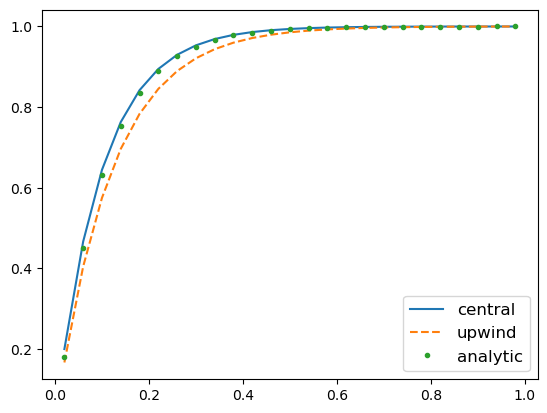

In [37]:
# convection term, central, second order
Mconv =  pf.convectionTerm(u_face) 

#  convection term, upwind, first order
Mconvupwind = pf.convectionUpwindTerm(u_face) 

# Diffusion term
Mdiff = pf.diffusionTerm(Dave)

# boundary condition discretization
Mbc, RHSbc = pf.boundaryConditionsTerm(BC)

# Coefficient matrix for central finite-differencing scheme
M = Mconv - Mdiff + Mbc 

# Coefficient matrix for upwind discretization scheme
Mupwind = Mconvupwind-Mdiff+Mbc

# Righ-hand-side vector
RHS = RHSbc

# solve for the central scheme
c = pf.solveMatrixPDE(meshstruct, M, RHS)

# solve for the upwind scheme
c_upwind = pf.solveMatrixPDE(meshstruct, Mupwind, RHS)

# analytic solution
c_analytical = (1-np.exp(u*x/D_val))/(1-np.exp(u*L/D_val))

# visualization
plt.figure()
plt.plot(x, c.value, '-', label='central')
plt.plot(x, c_upwind.value, '--', label='upwind')
plt.plot(x, c_analytical, '.', label='analytic')
plt.legend(fontsize=12, loc='best');

As you see here, we obtain a more accurate result by using a central difference discretization scheme for the convection term compared to the first order upwind.

### Solve a transient diffusion equation

This example is adapted from the FiPy 1D diffusion example

The transient diffusion equation reads

$$\alpha\frac{\partial c}{\partial t}+\nabla \cdot \left(-D\nabla c\right)=0,$$

where $c$ is the independent variable (concentration, temperature, etc) , $D$ is the diffusion coefficient, and $\alpha$ is a constant.

In [38]:
# Define the domain and create a mesh structure
L = 50.0   # domain length
Nx = 20  # number of cells
m = pf.Grid1D(Nx, L)
x = m.cellcenters.x  # cell centers position

In [39]:
# Solution variable

# Define the initial condition
c_init = 0.0

c = pf.CellVariable(m, c_init)

In [40]:
# Switch the left and right boundaries to Dirichlet
# left boundary
c.BCs.left.a[:] = 0.0
c.BCs.left.b[:] = 1.0
c.BCs.left.c[:] = 1.0
# right boundary
c.BCs.right.a[:] = 0.0
c.BCs.right.b[:] = 1.0
c.BCs.right.c[:] = 0.0 

c.apply_BCs()

In [41]:
# Define the transfer coefficients:
D_val = 1.0
D = pf.CellVariable(m, D_val)
Dave = pf.harmonicMean(D)  # convert it to face variables

# Define alfa, the coefficient of the transient term:
alfa_val = 1.0
alfa = pf.CellVariable(m, alfa_val)

In [42]:
# Now define the time step and the final time:
dt = 0.1  # time step
final_t = 100.0

Here, we first create the term matrices that will not change as we progress stepwise in time, *i.e.* diffusion term. The matrix equation terms ($\mathbf{M}$ and $\textrm{rhs}$) corresponding to the boundary condition are handled automatically by PyFVTool via `apply_BCs()` and `solvePDE()`.

In [43]:
diffterm = pf.diffusionTerm(Dave) # does not change when stepping in time

The transitionTerm function gives a matrix of coefficient and a RHS vector. The matrix of coefficient does not change in each time step, but the RHS does. Therefore, we need to call the `transientTerm()` function inside the time loop. 

Here's the time stepping loop:

In [44]:
tt = []
ci = []
ca = []
t = 0.
while t < final_t:
    transterm = pf.transientTerm(c, dt, alfa) # re-evaluate at each time step
    eqnterms = [ transterm,
                -diffterm]
    pf.solvePDE(c, eqnterms)
    t += dt # solution time

    tt.append(t)
    ci.append(c.copy())  # store all solutions (copy all contents)
    ca.append( 1.0-erf(x/(2*np.sqrt(D_val*t)))) # store analytic

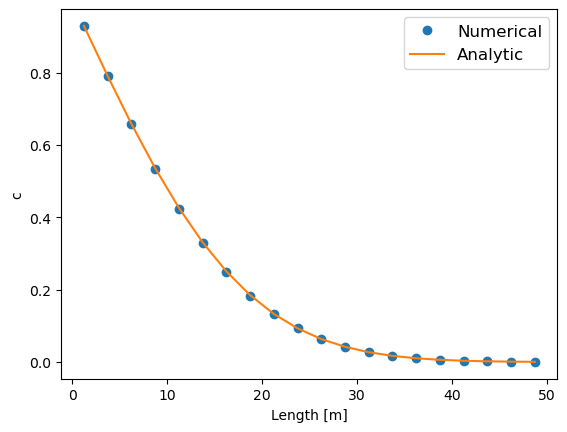

In [45]:
# Visualize the final results
plt.figure()
plt.plot(x, ci[-1].value, 'o', label='Numerical')
plt.plot(x, ca[-1], '-', label='Analytic')
plt.xlabel('Length [m]')
plt.ylabel('c')
plt.legend(fontsize=12, loc='best');

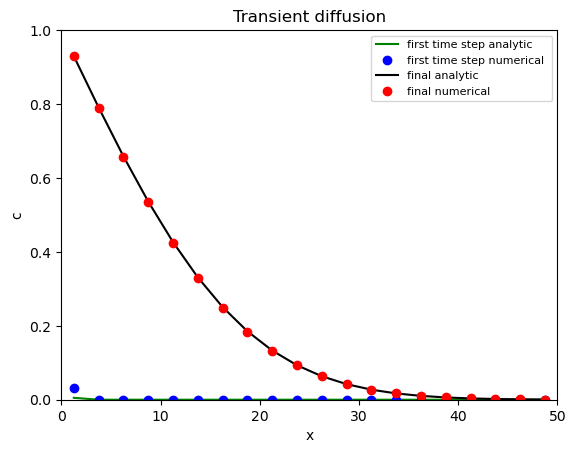

In [46]:
# Plotting and visualization of the 1D transient diffusion solution  
hfig1, ax1 = plt.subplots()

ax1.plot(x, ca[0], 'g-', label='first time step analytic')
ax1.plot(x, ci[0].value, 'bo', label='first time step numerical ')

ax1.plot(x, ca[-1], 'k-', label='final analytic')
ax1.plot(x, ci[-1].value, 'ro', label='final numerical')

ax1.set_xlim((0, L))
ax1.set_ylim((0.0, 1.0))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('Transient diffusion')
ax1.legend(fontsize=8);

### Convection equations; different discretization schemes

One special feature of this FVTool to be highlighted is its collection of discretization schemes for a linear convection term, which includes central difference (second order), upwind (first order), and TVD upwind scheme with various flux limiters.

Convective terms in transport PDEs are notoriously difficult to handle numerically, since all discretization schemes for convection display to a certain extent a numerical artefact aptly called "numerical diffusion" (illustrated below). This is sometimes combined with unphysical oscillations appearing in the numerical solution (especially when trying to reduce numerical diffusion). Specific clever numerical schemes have been developed to mitigate both effects, but these come often at increased computational cost.

Here, we are going to compare the performance of several schemes for solving a simple linear transient convection equation with an initial condition containing discontinuities. The discontinuties (or shocks) clearly bring out the numerical diffusion and the oscillations.

We define a simple linear transient convection PDE, with an initial condition having discontinuties,

$$ \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) = \vec{0} $$    

and periodic boundary conditions on a Cartesian 1D-domain with constant flow velocity coefficients $u$=0.3 m/s.

The periodic boundary conditions make that the stuff that goes out on one side of the domain re-enters on the other side (like Pac-Man and the ghosts in the original arcade game). This provides a means to transport by convection the initial condition one complete cycle such that the numerical solution is superposed with the initial condition. In the case of pure 1D convection, the solution after one complete cycle should be identical to the initial condition.

Initial condition:
$$\varphi\left(x, 0\right) \,=\, \begin{equation}
\left\{ 
  \begin{aligned}
    &0,\,\, &0.0 \le \,&x<0.04 \\
    &1\,\,  &0.04\le \,&x<0.24 \\
    &0\,\,  &0.24\le \,&x<0.36 \\    
    &\sin\left(10\,\pi\,x\right)\,\,  &0.36\le \,&x<0.8 \\        
    &0,\,\, &0.8 \le \,&x\le1.0 \\
  \end{aligned}
  \right.
\end{equation}
$$

In [47]:
# define a 1D domain and mesh
W = 1.0
Nx = 500
mesh1 = pf.Grid1D(Nx, W)
x = mesh1.cellcenters.x

In [48]:
# Set up a variable with initial values and BCs, that can be copied to have
# the same IC and BCs for solving with different numerical schemes
phiinit = pf.CellVariable(mesh1, 0.0)

phiinit.value[(0.04 <= x) & (x < 0.24)] = 1.0
phiinit.value[(0.36 <= x) & (x < 0.8)] = np.sin(x[(0.36 <= x) & (x < 0.8)]*10*np.pi) 

# Periodic boundary conditions:
phiinit.BCs.left.periodic = True 
phiinit.BCs.right.periodic = True

phiinit.apply_BCs()

In [49]:
# velocity field
u = 0.3   # m/s
uf = pf.FaceVariable(mesh1, u)

# transient term coefficient
alfa = pf.CellVariable(mesh1, 1.0)

The time step and simulation length are set so that the solution has traveled exactly one cycle over the periodic boundaries.

In [50]:
# set time step and simulation length
dt = 0.001  # [s], time step
final_t = W/u

#### Standard central difference scheme for convection

The standard `convectionTerm()` in PyFVTool uses the second order central differencing (CD) scheme. This scheme is not always recommended, especially at high Péclet numbers where convection dominates (see Chapter 4 of Versteeeg & Malalasekera (2007), "An Introduction to Computational Fluid Dynamics: The Finite Volume Method.", 2nd Edition).

The following solver uses the CD scheme.

In [51]:
# Solver: standard central difference

# Initialize solution variable
phi = phiinit.copy()

tt = 0.0
count = 0

phi_cendif = []

# Constant matrix eqn terms:
convterm = pf.convectionTerm(uf)   # standard central difference

while (tt<final_t) and (count < 5000):
    tt += dt
    transientterm = pf.transientTerm(phi, dt, alfa) 
    eqnterms = [transientterm,
                convterm]
    pf.solvePDE(phi, eqnterms)
    # Store the central difference solution for later animation
    phi_cendif.append(phi)
    count += 1

#### Pure upwind scheme for convection

Next, we use the same code, but replace the standard scheme with the (first order) upwind scheme, via `convectionUpwindTerm()`. This is a nice scheme for handling convection, but it suffers enormously from numerical diffusion.

In [52]:
# Solver: upwind only

# Initialize solution variable
phi = phiinit.copy()

tt = 0.0
count = 0

phi_uw = []

# Constant matrix eqn terms:
convupwindterm = pf.convectionUpwindTerm(uf)   # upwind convection term

while (tt<final_t) and (count < 5000):
    tt += dt
    transientterm = pf.transientTerm(phi, dt, alfa) 
    eqnterms = [transientterm,
                convupwindterm]
    pf.solvePDE(phi, eqnterms)
    # Store the upwind solution for later animation
    phi_uw.append(phi)
    count += 1

#### Upwind scheme with TVD correction for convection

It is possible to reduce the numerical diffusion in the upwind scheme without introducing unphysical oscillations. This involves application of a TVD ([total variation diminishing](https://en.wikipedia.org/wiki/Total_variation_diminishing)) scheme. The TVD scheme implemented in PyFVTool provides an 'explicit' correction term for the first degree upwind based on the values of phi in the previous time step. 

The TVD upwind scheme requires an inner loop with calls to `solvePDE()` to sweep the solution to convergence (this takes only a few cycles). During this inner loop the transient term keeps the coefficients used with the initial call to `solvePDE()` (and hence the 'old' value of the solution variable). Only the corrective TVD term for the upwind scheme `convectionTVDupwindRHSTerm()` needs to be recalculated at each cycle of the inner loop.

A function `convectionTVDTerm()` existed in early versions of PyFVTool that returned both the matrix of coefficients and the RHS corrector. This turns out to be wasteful, since the matrix term comes directly from the upwind scheme and does not change in the inner 'corrector' loop (if at all!). Therefore, we now have the `convectionTVDupwindRHSTerm()` that returns only the corrector term, to be applied in combination with the `convectionUpwindTerm()`.

Here, we use 3 iterations for the inner 'corrector' loop, but 5 may be more on the safe side. Strictly speaking, a convergence criterion would be needed for the inner TVD loop. However, in many existing codes (written for flow in porous media) a fixed number of iteration is used, usually 3. The "flow in porous media" community uses these tricks all the time simply because they work for their specific problem (often multiphase flow in porous media). However, it does not necessarily mean that this trick always works!

In [53]:
# Solver: upwind with TVD corrector (SUPERBEE flux limiter)

# Initialize solution variable
phi = phiinit.copy()

tt = 0.0
count = 0
phi_tvd = []


# Number of TVD inner loop cycles
N_TVDloop = 3 # works fine, perhaps 5 is better

# Choose a flux limiter
FL = pf.fluxLimiter('SUPERBEE')

# Constant matrix eqn terms:
convupwindterm = pf.convectionUpwindTerm(uf)   # upwind convection term

while (tt<final_t) and (count < 5000):
    tt += dt
    
    # Inner loop for TVD scheme
    # The transientterm should be kept constant over the TVD inner loop
    transientterm = pf.transientTerm(phi, dt, alfa) 
    for jj in range(N_TVDloop):
        # TVD RHS term
        tvdcorrterm = pf.convectionTVDupwindRHSTerm(uf, phi, FL)
        # construct and solve equation
        eqnterms = [transientterm,
                    convupwindterm,
                    tvdcorrterm]
        pf.solvePDE(phi, eqnterms)
    # After N_TVDloop cycles, the solution phi has converged
        
    # Store the TVD solution for later animation
    phi_tvd.append(phi)
    count += 1

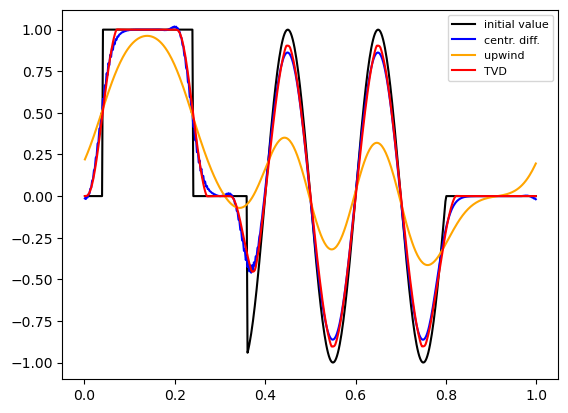

In [54]:
# Visualize the numerical solutions obtained with the different schemes
hfig, ax = plt.subplots(1, 1)
ax.plot(x, phiinit.value, 'k-', label='initial value')
ax.plot(x, phi_cendif[-1].value, 'b-', label='centr. diff.')
ax.plot(x, phi_uw[-1].value, '-', color='orange', label='upwind');
ax.plot(x, phi_tvd[-1].value, 'r-', label='TVD')
ax.legend(fontsize=8);

In the figure, we can clearly see the strong numerical diffusion in the basic upwind scheme. Remember, that the correct solution of the PDE in these conditions should be identical to the initial condition.

The central difference solution does not look too bad in this case, but has strange (and asymmetric) wiggles.

TVD-upwind has much less numerical diffusion than simple upwind, without any oscillation, but requires 5 times(!) more calculations.

Finally, we check mass conservation in this system.

In [55]:
print('Total mass in system')
for name, totalmass in zip(['initial',
                            'central differencing',
                            'upwind',
                            'TVD upwind'],
                           [phiinit.domainIntegral(),
                            phi_cendif[-1].domainIntegral(),
                            phi_uw[-1].domainIntegral(),
                            phi_tvd[-1].domainIntegral()]):
    print(f'- {name:20s}   {totalmass:.4f}')

Total mass in system
- initial                0.1780
- central differencing   0.1780
- upwind                 0.1776
- TVD upwind             0.1780
